### **Nombre:** Elda Magally Calderón Motta
### **Carné:** 16003182
### **Sección:** U

# **TAREA 6**

# Primera Parte 

## Backward Propagation Delta (Error Simplificado)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Diagrama

<img src = 'http://imgfz.com/i/2AOBoZL.png'>

### Backward Propagation

In [2]:
# Vector error capa de salida
error_salida = np.array([[3,10]])

In [3]:
# Parametros capa 3
w_capa3 = np.array([
    [-0.23, 0.22, 0.77], 
    [0.9, 0.88, -0.4],
])

In [4]:
# Propagacion del error a la capa 3
error_capa3 = np.matmul(error_salida, w_capa3)

In [5]:
# Parametros capa 2
w_capa2 = np.array([
    [-0.3, 0.62, 0.45], 
    [0.45, 0.57, 0.48],
    [0.65, 0.58, -0.45]
])

In [6]:
# Propagacion del error a la capa 2
error_capa2 = np.matmul(error_capa3, w_capa2)

In [7]:
# Parametros capa 1
w_capa1 = np.array([
    [0.3, 0.46, 0.02], 
    [0.22, -0.7, 0.65],
    [0.65, 0.9, 0.34]
])

In [8]:
# Propagacion del error a la capa 1 (entrada)
error_capa1 = np.matmul(error_capa2, w_capa1)

In [9]:
# Errores por neurona

print('Error Neuronas Capa 1:', error_capa1)
print('Error Neuronas Capa 2:', error_capa2)
print('Error Neuronas Capa 3:', error_capa3)
print('Error Neuronas Capa Salida:', error_salida)

Error Neuronas Capa 1: [[8.180294 1.74791  9.303912]]
Error Neuronas Capa 2: [[0.6655 9.5642 9.0408]]
Error Neuronas Capa 3: [[ 8.31  9.46 -1.69]]
Error Neuronas Capa Salida: [[ 3 10]]


# Segunda Parte 

## Entrenar Aproximador para XOR

### Red Neuronal XOR

<img src = 'http://imgfz.com/i/aYX8w9y.jpeg'>

### Feedforward Propagation

In [99]:
# Vector de entrada:

vector_input = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_real = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [138]:
# Inicilizando parametros aleatoriamente 
# Neuronas en filas

mu, sigma = 0, 0.1
w2 = np.random.normal(mu, sigma, 6).reshape(2,-1)
w3 = np.random.normal(mu, sigma, 6).reshape(3,-1)
w4 = np.random.normal(mu, sigma, 2).reshape(2,-1)

In [12]:
# Funcion Relu

def relu(x):
    a = x
    a[a < 0] = 0
    return a

In [114]:
# Representaciones Intermedias
H1 = np.matmul(vector_input, w2)
act1 = relu(H1)

In [115]:
H2 = np.matmul(act1, w3)
act2 = relu(H2)

In [103]:
H3 = np.matmul(act2, w4)
vector_output = H3

### Backward Propagation

In [17]:
# Funcion Derivada Relu

def der_relu(x):
    a = x
    a[a >= 0] = 1
    a[a < 0] = 0
    return (a)

In [108]:
# Error en Salida
error_salida = - y_real + vector_output

In [109]:
delta_capa3 = np.matmul(error_salida, w4.T)*der_relu(H2)

In [119]:
delta_capa2 = np.matmul(delta_capa3, w3.T)*der_relu(H1)

In [65]:
dw4 = np.matmul(error_salida.T, act2) / len(vector_input)

In [66]:
dw3 = np.matmul(delta_capa3.T, act1) / len(vector_input)

In [67]:
dw2 = np.matmul(delta_capa2.T, vector_input) / len(vector_input)

In [68]:
# Gradiente Descent
lr = 0.1

w2 = w2 - lr*dw2.T
w3 = w3 - lr*dw3.T
w4 = w4 - lr*dw4.T

In [69]:
dw2

array([[ 9.71089418,  9.14041553],
       [10.21874001,  9.61842731],
       [ 9.8434352 ,  9.26517026]])

In [70]:
print(error_salida)

[[ 0.        ]
 [ 4.88937416]
 [ 5.9989282 ]
 [12.88830236]]


# Funcion Entrenamiento

In [171]:
def entrenamiento_xor():

    # Vector de entrada:
    vector_input = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]
    ])

    y_real = np.array([
        [0],
        [1],
        [1],
        [0]
    ])

    # Inicilizando parametros aleatoriamente 
    # Neuronas en filas

    mu, sigma = 1, 1
    w2 = np.random.normal(mu, sigma, 6).reshape(2,-1)
    w3 = np.random.normal(mu, sigma, 6).reshape(3,-1)
    w4 = np.random.normal(mu, sigma, 2).reshape(2,-1)

    lr = 0.1

    # Entrenamiento
    for i in range(5105):
        # Representaciones Intermedias
        H1 = np.matmul(vector_input, w2)
        act1 = relu(H1)

        H2 = np.matmul(act1, w3)
        act2 = relu(H2)

        H3 = np.matmul(act2, w4)
        vector_output = H3

        # Deltas
        error_salida = vector_output - y_real
        delta_capa3 = np.matmul(error_salida, w4.T)*der_relu(H2)
        delta_capa2 = np.matmul(delta_capa3, w3.T)*der_relu(H1)

        H1 = np.matmul(vector_input, w2)
        act1 = relu(H1)
        H2 = np.matmul(act1, w3)
        act2 = relu(H2)

        # Derivadas Parciales Parametros
        dw4 = np.matmul(error_salida.T, act2) / len(vector_input)
        dw3 = np.matmul(delta_capa3.T, act1) / len(vector_input)
        dw2 = np.matmul(delta_capa2.T, vector_input) / len(vector_input)

        # Gradiente Descent
        w2 = w2 - lr*dw2.T
        w3 = w3 - lr*dw3.T
        w4 = w4 - lr*dw4.T

    print('vector output:', '\n', vector_output, '\n')
    print('error:', '\n', error_salida, '\n')
    print('parametros w2:', '\n', w2, '\n')
    print('parametros w3:', '\n', w3, '\n')
    print('parametros w4:', '\n', w4, '\n')        
    
    return(H2, act2)

### Experimento 1

In [177]:
Int1, Act1 = entrenamiento_xor()

vector output: 
 [[0.        ]
 [1.01934027]
 [1.08439901]
 [0.01330976]] 

error: 
 [[0.        ]
 [0.01934027]
 [0.08439901]
 [0.01330976]] 

parametros w2: 
 [[ 0.10351901 -0.01678186 -0.31596266]
 [-1.83799931  0.01806773  0.11738836]] 

parametros w3: 
 [[1.32824951 2.24226973]
 [0.01814827 0.59295113]
 [0.71925809 2.2748137 ]] 

parametros w4: 
 [[1.39491103]
 [3.048032  ]] 



### Experimento 2

In [180]:
Int2, Act2 = entrenamiento_xor()

vector output: 
 [[0.]
 [1.]
 [1.]
 [0.]] 

error: 
 [[ 0.00000000e+00]
 [-4.88498131e-15]
 [-8.88178420e-16]
 [ 0.00000000e+00]] 

parametros w2: 
 [[  0.78682999   1.62738857 -10.76729182]
 [ -0.30815404   0.19406067   0.18499644]] 

parametros w3: 
 [[ 0.99403997  1.38988521]
 [-0.99447067 -0.36526114]
 [ 2.63492573  1.76679255]] 

parametros w4: 
 [[1.65461724]
 [2.00327911]] 



### Experimento 3

In [184]:
Int3, Act3 = entrenamiento_xor()

vector output: 
 [[0.]
 [1.]
 [1.]
 [0.]] 

error: 
 [[0.0000000e+00]
 [4.4408921e-16]
 [4.4408921e-16]
 [0.0000000e+00]] 

parametros w2: 
 [[-4.75891612  1.43651767  3.55987143]
 [ 0.31482556  1.08624179 -0.78951532]] 

parametros w3: 
 [[ 2.06453363  2.73492983]
 [-1.22070112 -0.2979673 ]
 [-0.20299445  0.27118861]] 

parametros w4: 
 [[1.57775278]
 [1.86094538]] 



### Experimento 4

In [189]:
Int4, Act4 = entrenamiento_xor()

vector output: 
 [[0.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.24880589e-14]] 

error: 
 [[0.00000000e+00]
 [6.43929354e-15]
 [2.24265051e-14]
 [1.24880589e-14]] 

parametros w2: 
 [[ 0.50915087 -0.24964151  0.08974589]
 [ 0.82352097  3.06062551 -2.81989307]] 

parametros w3: 
 [[-0.7083835   0.36126678]
 [ 0.33584067 -1.05094329]
 [ 1.23839341  3.108091  ]] 

parametros w4: 
 [[2.24964869]
 [2.16039795]] 



### Experimento 5

In [191]:
Int5, Act5 = entrenamiento_xor()

vector output: 
 [[0.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.47104551e-15]] 

error: 
 [[ 0.00000000e+00]
 [-1.33226763e-15]
 [-1.22124533e-15]
 [ 1.47104551e-15]] 

parametros w2: 
 [[-1.38894687  1.27670553  1.39099375]
 [ 1.25862487 -0.0646781  -1.63800666]] 

parametros w3: 
 [[ 0.68871392  0.71833853]
 [ 1.3056529   0.11252187]
 [-0.56616204  0.54748275]] 

parametros w4: 
 [[-0.10390525]
 [ 1.20566956]] 



## Graficos

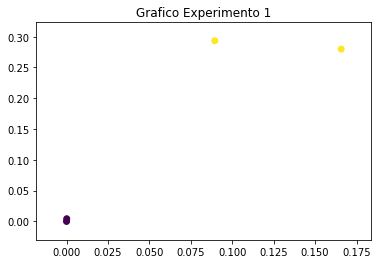

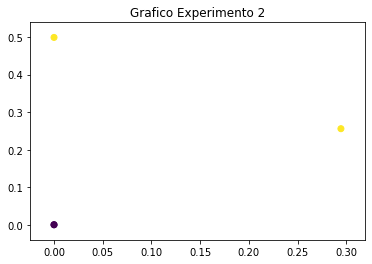

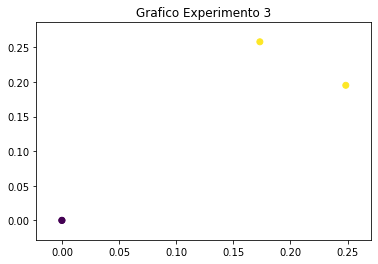

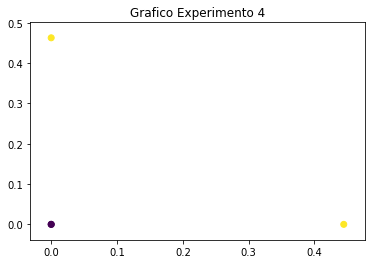

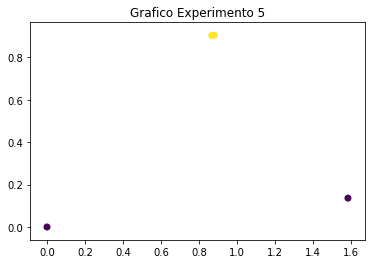

In [240]:
# Experimento 1
plt.scatter(Int1[:,0].reshape(1,-1), Int1[:,1].reshape(1,-1), c=y_real.reshape(1,-1))
plt.title('Grafico Experimento 1')
plt.show()

# Experimento 2
plt.scatter(Int2[:,0].reshape(1,-1), Int2[:,1].reshape(1,-1), c=y_real.reshape(1,-1))
plt.title('Grafico Experimento 2')
plt.show()

# Experimento 3
plt.scatter(Int3[:,0].reshape(1,-1), Int3[:,1].reshape(1,-1), c=y_real.reshape(1,-1))
plt.title('Grafico Experimento 3')
plt.show()

# Experimento 4
plt.scatter(Int4[:,0].reshape(1,-1), Int4[:,1].reshape(1,-1), c=y_real.reshape(1,-1))
plt.title('Grafico Experimento 4')
plt.show()

# Experimento 5
plt.scatter(Int5[:,0].reshape(1,-1), Int5[:,1].reshape(1,-1), c=y_real.reshape(1,-1))
plt.title('Grafico Experimento 5')
plt.show()

# Conclusiones

Como puede verse en los graficos de las representaciones intermedias de la segunda capa oculta, los datos fueron mapeados a un espacio latente de forma que pueden clasificarse fácilmente si se cruzará una línea. Esto es posible como parte del proceso de composición de funciones que se lleva a cabo en el entramiento de las redes neuronales.

También se puede ver en los gráficos que las representaciones intermedias siguen un cierto patrón, puede verse como los puntos amarillos (que corresponden a la clase 1) quedan en la parte superior derecha en la mayor parte de los experimentos, mientras que en la mayoría de experimentos los morados (que corresponden a la clase 0) quedan en la parte inferior izquierda. 

Otro punto interesante a comentar es que durante el entrenamiento se intentó inicializar con una distribución normal centrada en 0 y std de 0.1, sin embargo, la red neuronal no se entrenaba por lo que se cambió los parámetros de la inicialización a media 1 y std 1. Con esta distribución normal para inicializar los parámetros se logró el entrenamiento de la red neuronal, por lo que se puede ver la importancia que tiene la inicialización en un modelo y la experimentación para lograr un entrenamiento adecuado